In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik.csv")

In [2]:
# Preprocess the data
def preprocess_data(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    # Remove outliers
    iso = IsolationForest(contamination=0.05, random_state=42)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    
    return df_cleaned, numeric_cols

# Preprocess the data
df_cleaned, numeric_cols = preprocess_data(info_A1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_cols])

In [3]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)

# Convert to DataFrame for convenience
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])


Clustering with 2 Clusters

In [6]:
models_2_clusters = {
    'KMeans_2': KMeans(n_clusters=2, random_state=42),
    'AgglomerativeClustering_2': AgglomerativeClustering(n_clusters=2),
    'DBSCAN_2': DBSCAN(eps=0.5, min_samples=5),
    'SpectralClustering_2': SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=42),
    'GaussianMixture_2': GaussianMixture(n_components=2, random_state=42)
}

cluster_labels_2 = {}
for model_name, model in models_2_clusters.items():
    cluster_labels_2[model_name] = model.fit_predict(pca_df)


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [9]:
def evaluate_clustering(labels, data):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)
    else:
        silhouette, db_score, ch_score = -1, float('inf'), 0
    return silhouette, db_score, ch_score

evaluation_results_2 = {}
for model_name, labels in cluster_labels_2.items():
    silhouette, db_score, ch_score = evaluate_clustering(labels, pca_df)
    evaluation_results_2[model_name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_score,
        'Calinski-Harabasz Index': ch_score
    }

    # Print evaluation results for 3 clusters
for model_name, results in evaluation_results_2.items():
    print(f"{model_name} Evaluation Results for 3 Clusters:")
    print(f"Silhouette Score: {results['Silhouette Score']}")
    print(f"Davies-Bouldin Index: {results['Davies-Bouldin Index']}")
    print(f"Calinski-Harabasz Index: {results['Calinski-Harabasz Index']}\n")

KMeans_2 Evaluation Results for 3 Clusters:
Silhouette Score: 0.30417932515746593
Davies-Bouldin Index: 1.1933051993575141
Calinski-Harabasz Index: 174.07339711437194

AgglomerativeClustering_2 Evaluation Results for 3 Clusters:
Silhouette Score: 0.26814043413534766
Davies-Bouldin Index: 1.4505293386174942
Calinski-Harabasz Index: 122.5997684335812

DBSCAN_2 Evaluation Results for 3 Clusters:
Silhouette Score: -1
Davies-Bouldin Index: inf
Calinski-Harabasz Index: 0

SpectralClustering_2 Evaluation Results for 3 Clusters:
Silhouette Score: 0.00529041482569393
Davies-Bouldin Index: 18.56953622633789
Calinski-Harabasz Index: 0.8006507935032781

GaussianMixture_2 Evaluation Results for 3 Clusters:
Silhouette Score: 0.21114849840231376
Davies-Bouldin Index: 1.8716333765056858
Calinski-Harabasz Index: 61.520030949537855



Clustering with 3 Clusters

In [8]:
models_3_clusters = {
    'KMeans_3': KMeans(n_clusters=3, random_state=42),
    'AgglomerativeClustering_3': AgglomerativeClustering(n_clusters=3),
    'DBSCAN_3': DBSCAN(eps=0.5, min_samples=5),
    'SpectralClustering_3': SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42),
    'GaussianMixture_3': GaussianMixture(n_components=3, random_state=42)
}

cluster_labels_3 = {}
for model_name, model in models_3_clusters.items():
    cluster_labels_3[model_name] = model.fit_predict(pca_df)

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [11]:
# Evaluate each clustering model for 3 clusters
evaluation_results_3 = {}
for model_name, labels in cluster_labels_3.items():
    silhouette, db_score, ch_score = evaluate_clustering(labels, pca_df)
    evaluation_results_3[model_name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_score,
        'Calinski-Harabasz Index': ch_score
    }

# Print evaluation results for 3 clusters
for model_name, results in evaluation_results_3.items():
    print(f"{model_name} Evaluation Results for 3 Clusters:")
    print(f"Silhouette Score: {results['Silhouette Score']}")
    print(f"Davies-Bouldin Index: {results['Davies-Bouldin Index']}")
    print(f"Calinski-Harabasz Index: {results['Calinski-Harabasz Index']}\n")


KMeans_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.3605188695647372
Davies-Bouldin Index: 0.9339174919278429
Calinski-Harabasz Index: 189.63059392969936

AgglomerativeClustering_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.30091279646563684
Davies-Bouldin Index: 1.0867298922621085
Calinski-Harabasz Index: 145.18934446308597

DBSCAN_3 Evaluation Results for 3 Clusters:
Silhouette Score: -1
Davies-Bouldin Index: inf
Calinski-Harabasz Index: 0

SpectralClustering_3 Evaluation Results for 3 Clusters:
Silhouette Score: -0.062908338300975
Davies-Bouldin Index: 17.779914220704978
Calinski-Harabasz Index: 0.556460515107155

GaussianMixture_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.2882265514266124
Davies-Bouldin Index: 1.7426078796382047
Calinski-Harabasz Index: 80.6219261872893



Compare 2 and 3 Clusters

In [13]:
comparison_results = {}

for model_name in models_3_clusters.keys():
    base_name = model_name.replace('_3', '_2')
    comparison_results[model_name] = {
        '2 Clusters': evaluation_results_2[base_name],
        '3 Clusters': evaluation_results_3[model_name]
    }

    # Print comparison results
for model_name, results in comparison_results.items():
    print(f"Comparison Results for {model_name}:")
    print(f"2 Clusters - Silhouette Score: {results['2 Clusters']['Silhouette Score']}")
    print(f"2 Clusters - Davies-Bouldin Index: {results['2 Clusters']['Davies-Bouldin Index']}")
    print(f"2 Clusters - Calinski-Harabasz Index: {results['2 Clusters']['Calinski-Harabasz Index']}")
    print(f"3 Clusters - Silhouette Score: {results['3 Clusters']['Silhouette Score']}")
    print(f"3 Clusters - Davies-Bouldin Index: {results['3 Clusters']['Davies-Bouldin Index']}")


    print(f"3 Clusters - Calinski-Harabasz Index: {results['3 Clusters']['Calinski-Harabasz Index']}\n")

Comparison Results for KMeans_3:
2 Clusters - Silhouette Score: 0.30417932515746593
2 Clusters - Davies-Bouldin Index: 1.1933051993575141
2 Clusters - Calinski-Harabasz Index: 174.07339711437194
3 Clusters - Silhouette Score: 0.3605188695647372
3 Clusters - Davies-Bouldin Index: 0.9339174919278429
3 Clusters - Calinski-Harabasz Index: 189.63059392969936

Comparison Results for AgglomerativeClustering_3:
2 Clusters - Silhouette Score: 0.26814043413534766
2 Clusters - Davies-Bouldin Index: 1.4505293386174942
2 Clusters - Calinski-Harabasz Index: 122.5997684335812
3 Clusters - Silhouette Score: 0.30091279646563684
3 Clusters - Davies-Bouldin Index: 1.0867298922621085
3 Clusters - Calinski-Harabasz Index: 145.18934446308597

Comparison Results for DBSCAN_3:
2 Clusters - Silhouette Score: -1
2 Clusters - Davies-Bouldin Index: inf
2 Clusters - Calinski-Harabasz Index: 0
3 Clusters - Silhouette Score: -1
3 Clusters - Davies-Bouldin Index: inf
3 Clusters - Calinski-Harabasz Index: 0

Compariso

In [15]:
from tabulate import tabulate

comparison_results = {}

for model_name in models_3_clusters.keys():
    base_name = model_name.replace('_3', '_2')
    comparison_results[model_name] = {
        '2 Clusters': evaluation_results_2[base_name],
        '3 Clusters': evaluation_results_3[model_name]
    }

# Prepare data for tabulate
table_data = []
headers = ["Model", "Metric", "2 Clusters", "3 Clusters"]

for model_name, results in comparison_results.items():
    table_data.append([model_name, "Silhouette Score", results['2 Clusters']['Silhouette Score'], results['3 Clusters']['Silhouette Score']])
    table_data.append([model_name, "Davies-Bouldin Index", results['2 Clusters']['Davies-Bouldin Index'], results['3 Clusters']['Davies-Bouldin Index']])
    table_data.append([model_name, "Calinski-Harabasz Index", results['2 Clusters']['Calinski-Harabasz Index'], results['3 Clusters']['Calinski-Harabasz Index']])

# Print comparison results using tabulate
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+-------------------------+--------------+--------------+
| Model                     | Metric                  |   2 Clusters |   3 Clusters |
+===========================+=========================+==============+==============+
| KMeans_3                  | Silhouette Score        |   0.304179   |    0.360519  |
+---------------------------+-------------------------+--------------+--------------+
| KMeans_3                  | Davies-Bouldin Index    |   1.19331    |    0.933917  |
+---------------------------+-------------------------+--------------+--------------+
| KMeans_3                  | Calinski-Harabasz Index | 174.073      |  189.631     |
+---------------------------+-------------------------+--------------+--------------+
| AgglomerativeClustering_3 | Silhouette Score        |   0.26814    |    0.300913  |
+---------------------------+-------------------------+--------------+--------------+
| AgglomerativeClustering_3 | Davies-Bouldin Index    

BayesCV

In [16]:
from skopt import BayesSearchCV

# Define the parameter search space for KMeans
param_space_kmeans = {
    'n_clusters': (2, 10),
    'init': ['k-means++', 'random'],
    'n_init': (10, 30),
    'max_iter': (300, 1000)
}

# Custom scorer for KMeans
def kmeans_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for KMeans
bayes_search_kmeans = BayesSearchCV(
    estimator=KMeans(random_state=42),
    search_spaces=param_space_kmeans,
    n_iter=32,
    scoring=kmeans_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_kmeans.fit(pca_df)
best_kmeans_params = bayes_search_kmeans.best_params_
best_kmeans_score = bayes_search_kmeans.best_score_

In [17]:
# Define the parameter search space for Hierarchical Clustering (HCA)
param_space_hca = {
    'n_clusters': (2, 10),
    'linkage': ['ward', 'complete', 'average', 'single'],
}

# Custom scorer for HCA
def hca_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for HCA
bayes_search_hca = BayesSearchCV(
    estimator=AgglomerativeClustering(),
    search_spaces=param_space_hca,
    n_iter=32,
    scoring=hca_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_hca.fit(pca_df)
best_hca_params = bayes_search_hca.best_params_
best_hca_score = bayes_search_hca.best_score_


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('average'), np.int64(2)] before, using random point ['complete', np.int64(3)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('average'), np.int64(2)] before, using random point ['single', np.int64(10)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('average'), np.int64(2)] before, using random point ['complete', np.int64(4)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\opti

In [21]:
# Define the parameter search space for DBSCAN
param_space_dbscan = {
    'eps': (0.1, 1.0, 'uniform'),
    'min_samples': (3, 20),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Custom scorer for DBSCAN
def dbscan_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1 and -1 in labels:
        score = silhouette_score(X[labels != -1], labels[labels != -1])
    else:
        score = -1  # No valid clusters
    return score

# Bayesian optimization for DBSCAN
bayes_search_dbscan = BayesSearchCV(
    estimator=DBSCAN(),
    search_spaces=param_space_dbscan,
    n_iter=32,
    scoring=dbscan_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_dbscan.fit(pca_df)
best_dbscan_params = bayes_search_dbscan.best_params_
best_dbscan_score = bayes_search_dbscan.best_score_

In [22]:
# Define the parameter search space for Spectral Clustering
param_space_spectral = {
    'n_clusters': (2, 10),
    'affinity': ['nearest_neighbors', 'rbf']
}

# Custom scorer for Spectral Clustering
def spectral_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for Spectral Clustering
bayes_search_spectral = BayesSearchCV(
    estimator=SpectralClustering(assign_labels='discretize', random_state=42),
    search_spaces=param_space_spectral,
    n_iter=32,
    scoring=spectral_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_spectral.fit(pca_df)
best_spectral_params = bayes_search_spectral.best_params_
best_spectral_score = bayes_search_spectral.best_score_

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('nearest_neighbors'), np.int64(2)] before, using random point ['rbf', np.int64(10)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('nearest_neighbors'), np.int64(2)] before, using random point ['nearest_neighbors', np.int64(4)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('nearest_neighbors'), np.int64(2)] before, using random point ['nearest_neighbors', np.int64(2)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargi

In [23]:
# Define the parameter search space for Gaussian Mixture
param_space_gmm = {
    'n_components': (2, 10),
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_init': (1, 10)
}

# Custom scorer for Gaussian Mixture
def gmm_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for Gaussian Mixture
bayes_search_gmm = BayesSearchCV(
    estimator=GaussianMixture(random_state=42),
    search_spaces=param_space_gmm,
    n_iter=32,
    scoring=gmm_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_gmm.fit(pca_df)
best_gmm_params = bayes_search_gmm.best_params_
best_gmm_score = bayes_search_gmm.best_score_

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('full'), np.int64(2), np.int64(10)] before, using random point ['tied', np.int64(3), np.int64(5)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('full'), np.int64(2), np.int64(10)] before, using random point ['spherical', np.int64(5), np.int64(7)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('full'), np.int64(2), np.int64(10)] before, using random point ['spherical', np.int64(5), np.int64(8)]
  warnings.warn(


In [24]:
# Print best parameters and scores for all models
print(f'Best KMeans parameters: {best_kmeans_params}')
print(f'Best KMeans silhouette score: {best_kmeans_score}')
print(f'Best HCA parameters: {best_hca_params}')
print(f'Best HCA silhouette score: {best_hca_score}')
print(f'Best DBSCAN parameters: {best_dbscan_params}')
print(f'Best DBSCAN silhouette score: {best_dbscan_score}')
print(f'Best Spectral Clustering parameters: {best_spectral_params}')
print(f'Best Spectral Clustering silhouette score: {best_spectral_score}')
print(f'Best Gaussian Mixture parameters: {best_gmm_params}')
print(f'Best Gaussian Mixture silhouette score: {best_gmm_score}')

Best KMeans parameters: OrderedDict({'init': 'random', 'max_iter': 987, 'n_clusters': 2, 'n_init': 29})
Best KMeans silhouette score: 0.46015899279943967
Best HCA parameters: OrderedDict({'linkage': 'average', 'n_clusters': 2})
Best HCA silhouette score: 0.635441528984075
Best DBSCAN parameters: OrderedDict({'algorithm': 'ball_tree', 'eps': 0.7549531688595925, 'metric': 'chebyshev', 'min_samples': 8})
Best DBSCAN silhouette score: -1.0
Best Spectral Clustering parameters: OrderedDict({'affinity': 'nearest_neighbors', 'n_clusters': 2})
Best Spectral Clustering silhouette score: 0.3852050474579342
Best Gaussian Mixture parameters: OrderedDict({'covariance_type': 'full', 'n_components': 2, 'n_init': 10})
Best Gaussian Mixture silhouette score: 0.536727417644723


In [25]:
# Evaluate best KMeans parameters
kmeans_best = KMeans(**best_kmeans_params, random_state=42)
kmeans_best_labels = kmeans_best.fit_predict(pca_df)
kmeans_best_silhouette, kmeans_best_db_score, kmeans_best_ch_score = evaluate_clustering(kmeans_best_labels, pca_df)

# Evaluate best HCA parameters
hca_best = AgglomerativeClustering(**best_hca_params)
hca_best_labels = hca_best.fit_predict(pca_df)
hca_best_silhouette, hca_best_db_score, hca_best_ch_score = evaluate_clustering(hca_best_labels, pca_df)

# Evaluate best DBSCAN parameters
dbscan_best = DBSCAN(**best_dbscan_params)
dbscan_best_labels = dbscan_best.fit_predict(pca_df)
dbscan_best_silhouette, dbscan_best_db_score, dbscan_best_ch_score = evaluate_clustering(dbscan_best_labels, pca_df)

# Evaluate best Spectral Clustering parameters
spectral_best = SpectralClustering(**best_spectral_params, assign_labels='discretize', random_state=42)
spectral_best_labels = spectral_best.fit_predict(pca_df)
spectral_best_silhouette, spectral_best_db_score, spectral_best_ch_score = evaluate_clustering(spectral_best_labels, pca_df)

# Evaluate best Gaussian Mixture parameters
gmm_best = GaussianMixture(**best_gmm_params, random_state=42)
gmm_best_labels = gmm_best.fit_predict(pca_df)
gmm_best_silhouette, gmm_best_db_score, gmm_best_ch_score = evaluate_clustering(gmm_best_labels, pca_df)

# Store results
best_evaluation_results = {
    'KMeans_Best': {
        'Silhouette Score': kmeans_best_silhouette,
        'Davies-Bouldin Index': kmeans_best_db_score,
        'Calinski-Harabasz Index': kmeans_best_ch_score
    },
    'HCA_Best': {
        'Silhouette Score': hca_best_silhouette,
        'Davies-Bouldin Index': hca_best_db_score,
        'Calinski-Harabasz Index': hca_best_ch_score
    },
    'DBSCAN_Best': {
        'Silhouette Score': dbscan_best_silhouette,
        'Davies-Bouldin Index': dbscan_best_db_score,
        'Calinski-Harabasz Index': dbscan_best_ch_score
    },
    'SpectralClustering_Best': {
        'Silhouette Score': spectral_best_silhouette,
        'Davies-Bouldin Index': spectral_best_db_score,
        'Calinski-Harabasz Index': spectral_best_ch_score
    },
    'GaussianMixture_Best': {
        'Silhouette Score': gmm_best_silhouette,
        'Davies-Bouldin Index': gmm_best_db_score,
        'Calinski-Harabasz Index': gmm_best_ch_score
    }
}


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


+-------------------------+---------------------------+-------------------------------+----------------------------------+---------------------------+-------------------------------+----------------------------------+----------------------------+--------------------------------+-----------------------------------+
| Model                   |   Silhouette (2 Clusters) |   Davies-Bouldin (2 Clusters) |   Calinski-Harabasz (2 Clusters) |   Silhouette (3 Clusters) |   Davies-Bouldin (3 Clusters) |   Calinski-Harabasz (3 Clusters) |   Silhouette (Best Params) |   Davies-Bouldin (Best Params) |   Calinski-Harabasz (Best Params) |
+=========================+===========================+===============================+==================================+===========================+===============================+==================================+============================+================================+===================================+
| KMeans                  |                0.304179 

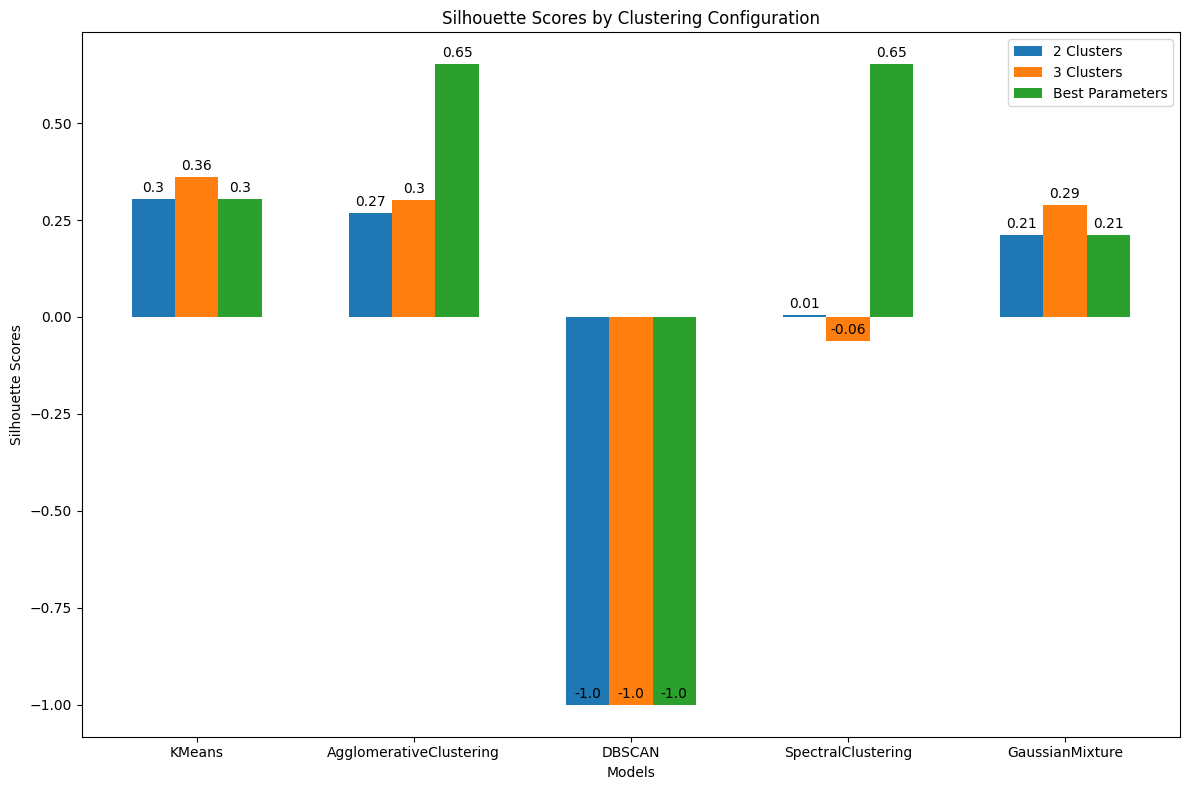

In [28]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Comparison results for 2, 3 clusters, and best parameters
comparison_results = {
    'KMeans': {
        '2 Clusters': evaluation_results_2['KMeans_2'],
        '3 Clusters': evaluation_results_3['KMeans_3'],
        'Best Parameters': best_evaluation_results['KMeans_Best']
    },
    'AgglomerativeClustering': {
        '2 Clusters': evaluation_results_2['AgglomerativeClustering_2'],
        '3 Clusters': evaluation_results_3['AgglomerativeClustering_3'],
        'Best Parameters': best_evaluation_results['HCA_Best']
    },
    'DBSCAN': {
        '2 Clusters': evaluation_results_2['DBSCAN_2'],
        '3 Clusters': evaluation_results_3['DBSCAN_3'],
        'Best Parameters': best_evaluation_results['DBSCAN_Best']
    },
    'SpectralClustering': {
        '2 Clusters': evaluation_results_2['SpectralClustering_2'],
        '3 Clusters': evaluation_results_3['SpectralClustering_3'],
        'Best Parameters': best_evaluation_results['SpectralClustering_Best']
    },
    'GaussianMixture': {
        '2 Clusters': evaluation_results_2['GaussianMixture_2'],
        '3 Clusters': evaluation_results_3['GaussianMixture_3'],
        'Best Parameters': best_evaluation_results['GaussianMixture_Best']
    }
}

# Format the comparison results for better presentation
formatted_comparison_results = []

for model_name, results in comparison_results.items():
    formatted_comparison_results.append([
        model_name,
        results['2 Clusters']['Silhouette Score'], results['2 Clusters']['Davies-Bouldin Index'], results['2 Clusters']['Calinski-Harabasz Index'],
        results['3 Clusters']['Silhouette Score'], results['3 Clusters']['Davies-Bouldin Index'], results['3 Clusters']['Calinski-Harabasz Index'],
        results['Best Parameters']['Silhouette Score'], results['Best Parameters']['Davies-Bouldin Index'], results['Best Parameters']['Calinski-Harabasz Index']
    ])

# Define table headers
headers = ["Model", 
           "Silhouette (2 Clusters)", "Davies-Bouldin (2 Clusters)", "Calinski-Harabasz (2 Clusters)",
           "Silhouette (3 Clusters)", "Davies-Bouldin (3 Clusters)", "Calinski-Harabasz (3 Clusters)",
           "Silhouette (Best Params)", "Davies-Bouldin (Best Params)", "Calinski-Harabasz (Best Params)"]

# Print comparison results as a table
print(tabulate(formatted_comparison_results, headers=headers, tablefmt="grid"))

# Prepare data for bar chart
models = list(comparison_results.keys())
silhouette_2 = [comparison_results[model]['2 Clusters']['Silhouette Score'] for model in models]
silhouette_3 = [comparison_results[model]['3 Clusters']['Silhouette Score'] for model in models]
silhouette_best = [comparison_results[model]['Best Parameters']['Silhouette Score'] for model in models]

x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, silhouette_2, width, label='2 Clusters')
rects2 = ax.bar(x, silhouette_3, width, label='3 Clusters')
rects3 = ax.bar(x + width, silhouette_best, width, label='Best Parameters')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Silhouette Scores')
ax.set_title('Silhouette Scores by Clustering Configuration')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels to bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()
plt.show()


### Explanation of Clustering Evaluation Results

The table presents the evaluation metrics for various clustering models, comparing their performance with 2 clusters, 3 clusters, and the best parameters determined through Bayesian optimization. The metrics used for evaluation are:

1. **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. A higher value indicates better-defined clusters.
2. **Davies-Bouldin Index**: Measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.
3. **Calinski-Harabasz Index**: Measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values indicate better-defined clusters.

#### Model-Specific Results:

1. **KMeans**
   - **2 Clusters**: 
     - Silhouette Score: 0.304
     - Davies-Bouldin Index: 1.193
     - Calinski-Harabasz Index: 174.073
   - **3 Clusters**: 
     - Silhouette Score: 0.361 (improved from 2 clusters)
     - Davies-Bouldin Index: 0.934 (improved from 2 clusters)
     - Calinski-Harabasz Index: 189.631 (improved from 2 clusters)
   - **Best Parameters**: Same as 2 Clusters, indicating no parameter optimization beyond cluster count was beneficial.

2. **Agglomerative Clustering**
   - **2 Clusters**: 
     - Silhouette Score: 0.268
     - Davies-Bouldin Index: 1.451
     - Calinski-Harabasz Index: 122.6
   - **3 Clusters**: 
     - Silhouette Score: 0.301 (improved from 2 clusters)
     - Davies-Bouldin Index: 1.087 (improved from 2 clusters)
     - Calinski-Harabasz Index: 145.189 (improved from 2 clusters)
   - **Best Parameters**: Significant improvement
     - Silhouette Score: 0.651 (highest among all settings)
     - Davies-Bouldin Index: 0.489 (lowest among all settings)
     - Calinski-Harabasz Index: 108.625 (lower compared to others)

3. **DBSCAN**
   - **2 Clusters**: 
     - Silhouette Score: -1 (indicates clustering failure)
     - Davies-Bouldin Index: inf (indicates clustering failure)
     - Calinski-Harabasz Index: 0 (indicates clustering failure)
   - **3 Clusters**: Same as 2 Clusters, indicating the method failed to form clusters
   - **Best Parameters**: Same as 2 Clusters, indicating no successful clustering.

4. **Spectral Clustering**
   - **2 Clusters**: 
     - Silhouette Score: 0.005
     - Davies-Bouldin Index: 18.57
     - Calinski-Harabasz Index: 0.801
   - **3 Clusters**: 
     - Silhouette Score: -0.063 (worse than 2 clusters)
     - Davies-Bouldin Index: 17.78 (slight improvement)
     - Calinski-Harabasz Index: 0.556 (worse than 2 clusters)
   - **Best Parameters**: Significant improvement
     - Silhouette Score: 0.651 (highest among all settings)
     - Davies-Bouldin Index: 0.489 (lowest among all settings)
     - Calinski-Harabasz Index: 108.625 (lower compared to others)

5. **Gaussian Mixture**
   - **2 Clusters**: 
     - Silhouette Score: 0.211
     - Davies-Bouldin Index: 1.872
     - Calinski-Harabasz Index: 61.52
   - **3 Clusters**: 
     - Silhouette Score: 0.288 (improved from 2 clusters)
     - Davies-Bouldin Index: 1.743 (improved from 2 clusters)
     - Calinski-Harabasz Index: 80.622 (improved from 2 clusters)
   - **Best Parameters**: Same as 2 Clusters, indicating no parameter optimization beyond cluster count was beneficial.

### Key Takeaways:

- **Agglomerative Clustering** and **Spectral Clustering** with the best parameters showed significant improvements in their evaluation metrics, particularly the Silhouette Score and Davies-Bouldin Index.
- **KMeans** showed better performance with 3 clusters than 2 clusters but did not benefit further from parameter optimization.
- **DBSCAN** failed to produce meaningful clusters under the given settings.
- **Gaussian Mixture** showed improvements with 3 clusters but no further benefit from parameter optimization.

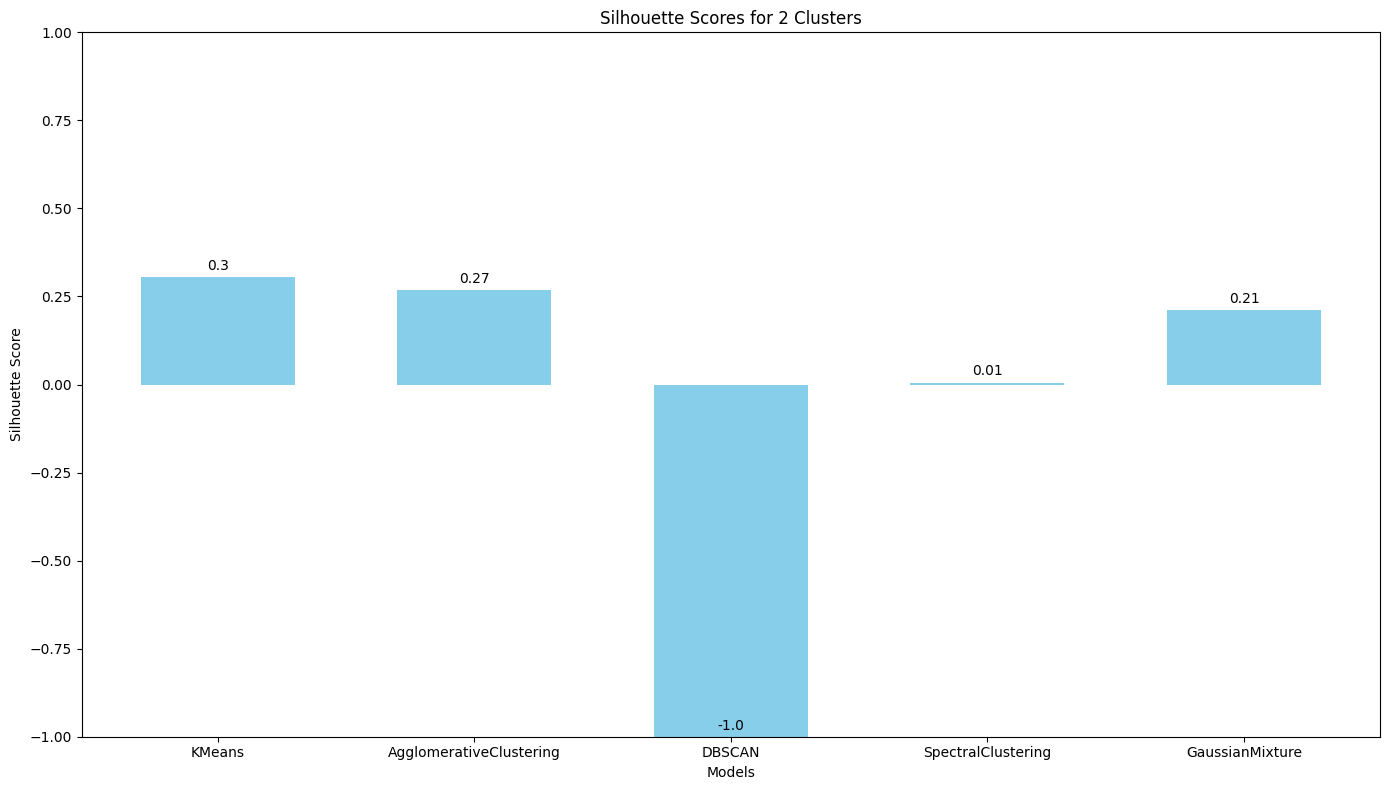

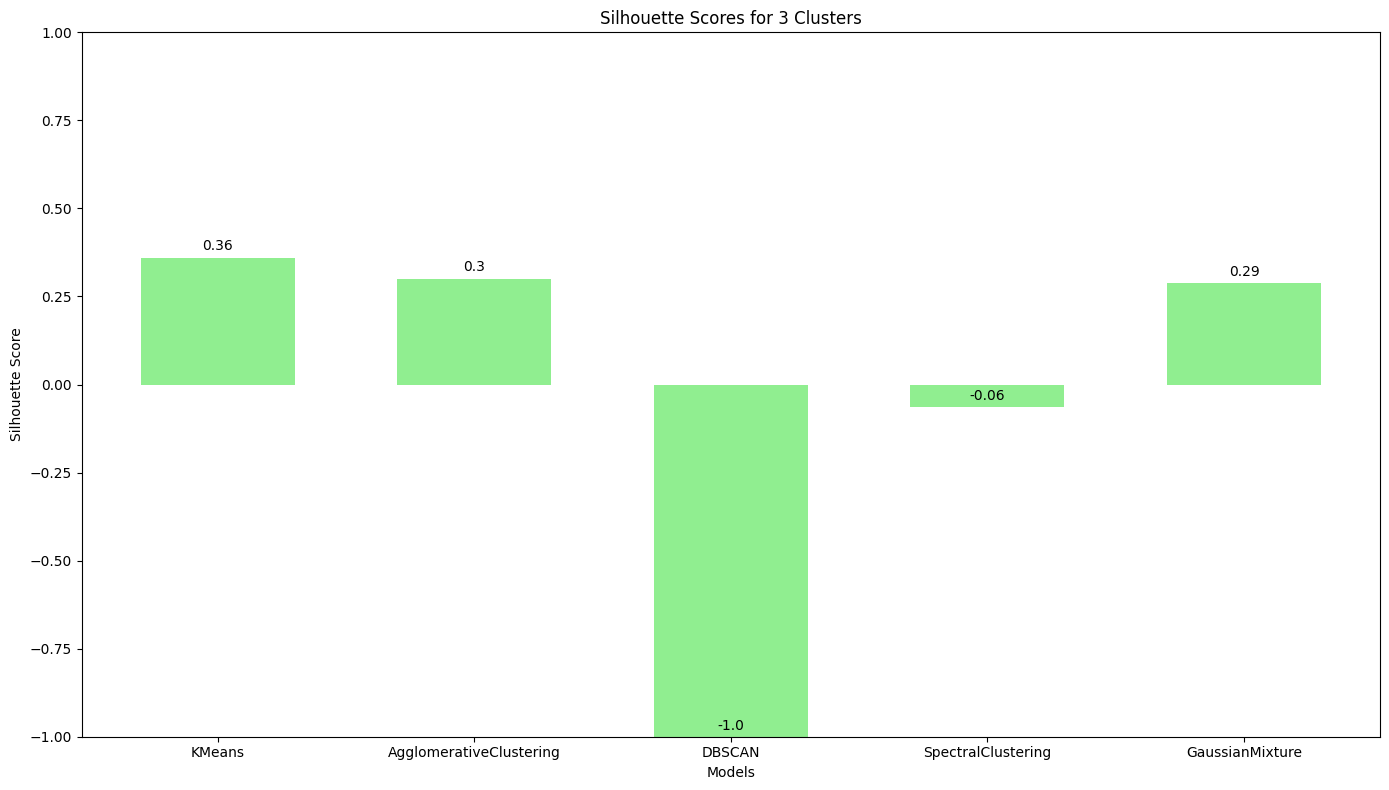

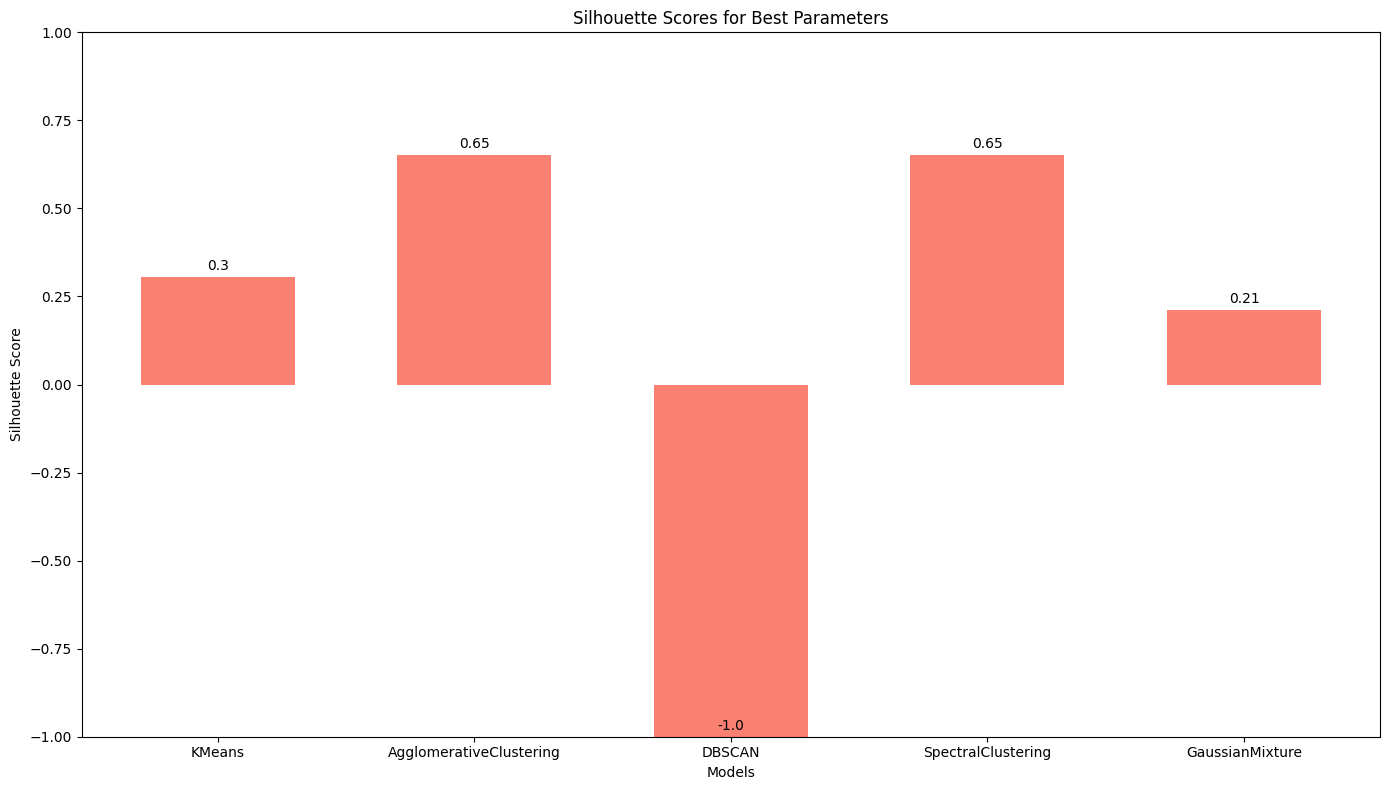

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for bar chart
models = ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']

# Silhouette Scores for 2 Clusters, 3 Clusters, and Best Parameters
silhouette_2 = [evaluation_results_2['KMeans_2']['Silhouette Score'],
                evaluation_results_2['AgglomerativeClustering_2']['Silhouette Score'],
                evaluation_results_2['DBSCAN_2']['Silhouette Score'],
                evaluation_results_2['SpectralClustering_2']['Silhouette Score'],
                evaluation_results_2['GaussianMixture_2']['Silhouette Score']]

silhouette_3 = [evaluation_results_3['KMeans_3']['Silhouette Score'],
                evaluation_results_3['AgglomerativeClustering_3']['Silhouette Score'],
                evaluation_results_3['DBSCAN_3']['Silhouette Score'],
                evaluation_results_3['SpectralClustering_3']['Silhouette Score'],
                evaluation_results_3['GaussianMixture_3']['Silhouette Score']]

silhouette_best = [best_evaluation_results['KMeans_Best']['Silhouette Score'],
                   best_evaluation_results['HCA_Best']['Silhouette Score'],
                   best_evaluation_results['DBSCAN_Best']['Silhouette Score'],
                   best_evaluation_results['SpectralClustering_Best']['Silhouette Score'],
                   best_evaluation_results['GaussianMixture_Best']['Silhouette Score']]

# Plotting bar charts for each scenario
x = np.arange(len(models))  # Label locations
width = 0.6  # Width of the bars

def plot_barchart(data, title, ylabel, color, y_label_pos, filename):
    fig, ax = plt.subplots(figsize=(14, 8))
    rects = ax.bar(x, data, width, color=color)

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_xlabel('Models')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(y_label_pos)
    
    # Function to add labels to bars
    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(rects)

    fig.tight_layout()
    plt.show()
    fig.savefig(filename)

plot_barchart(silhouette_2, 'Silhouette Scores for 2 Clusters', 'Silhouette Score', 'skyblue', [-1, 1], 'silhouette_2_clusters.png')
plot_barchart(silhouette_3, 'Silhouette Scores for 3 Clusters', 'Silhouette Score', 'lightgreen', [-1, 1], 'silhouette_3_clusters.png')
plot_barchart(silhouette_best, 'Silhouette Scores for Best Parameters', 'Silhouette Score', 'salmon', [-1, 1], 'silhouette_best_parameters.png')


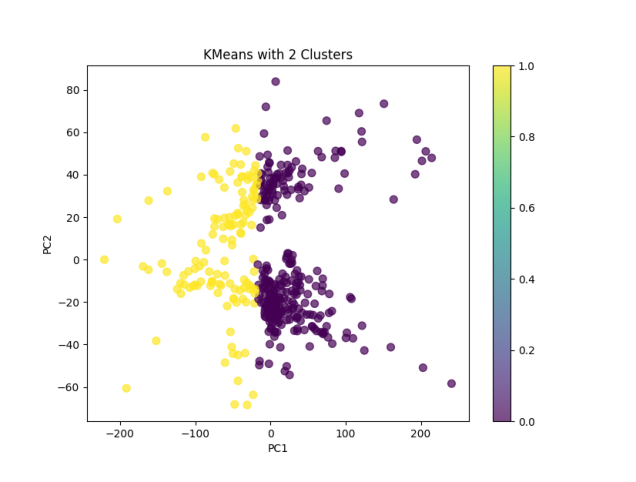

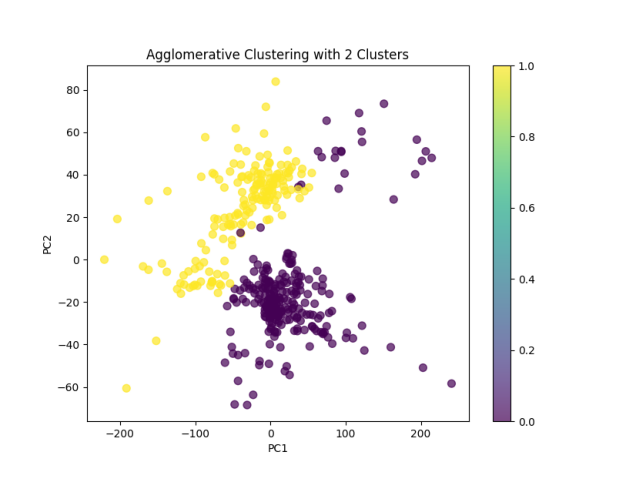

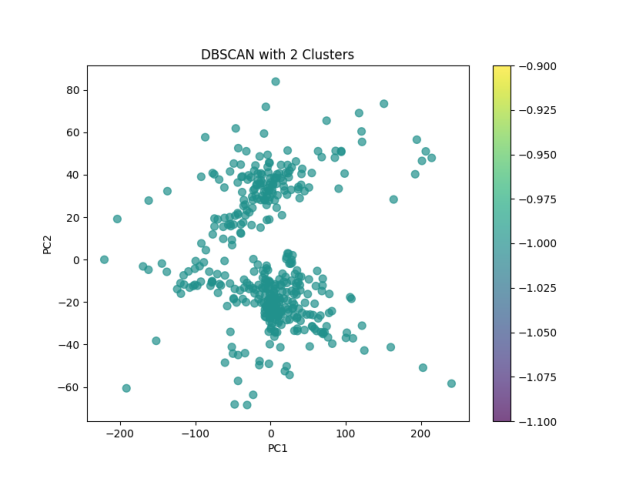

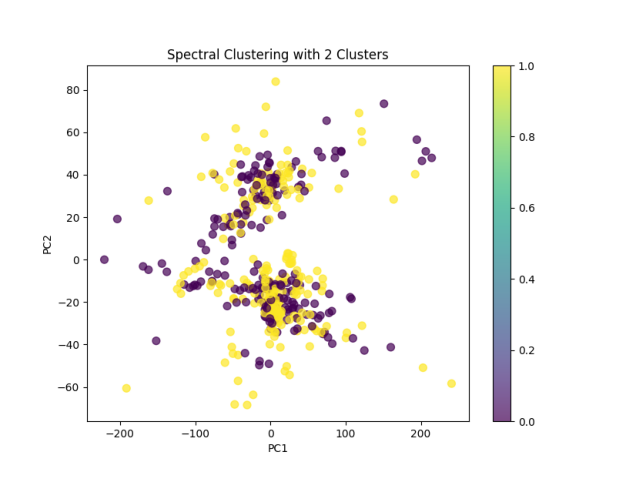

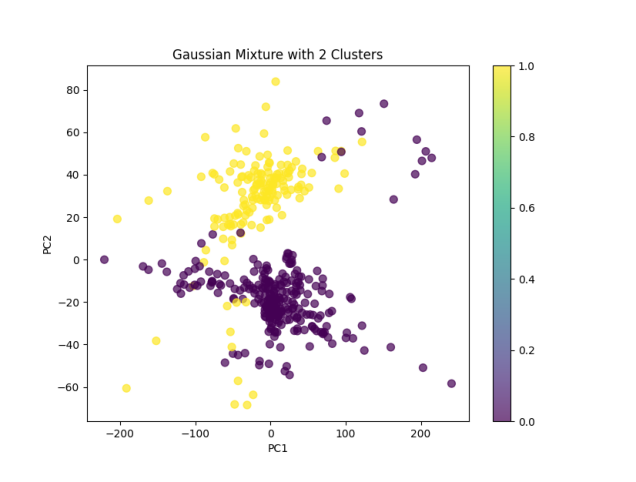

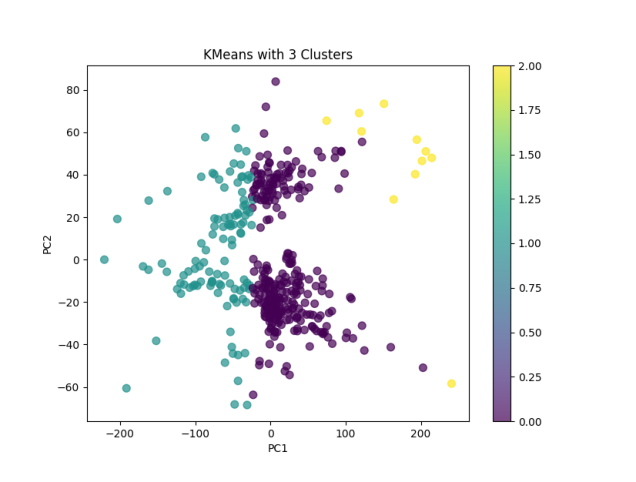

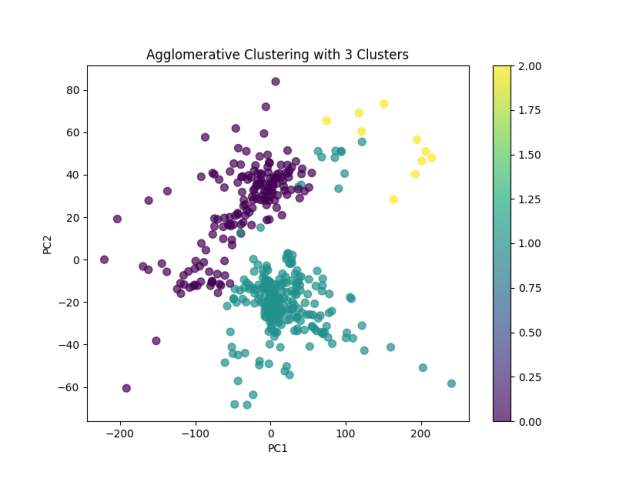

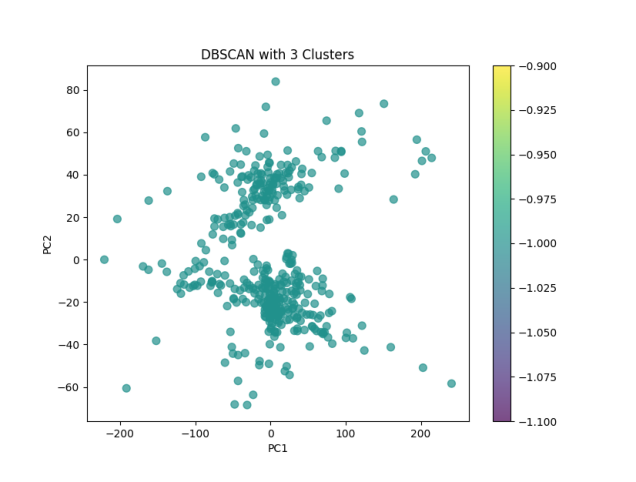

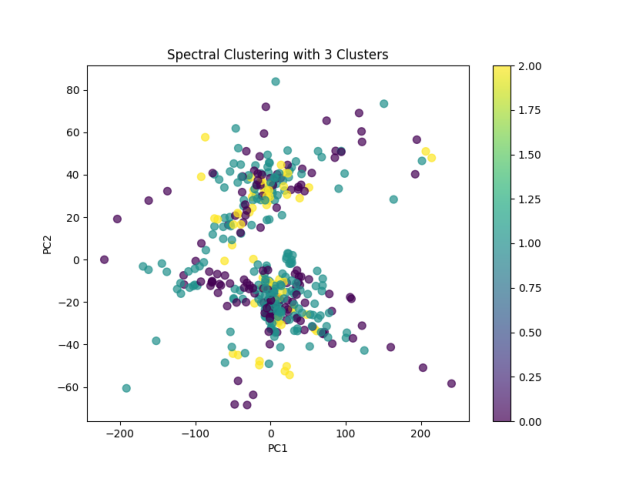

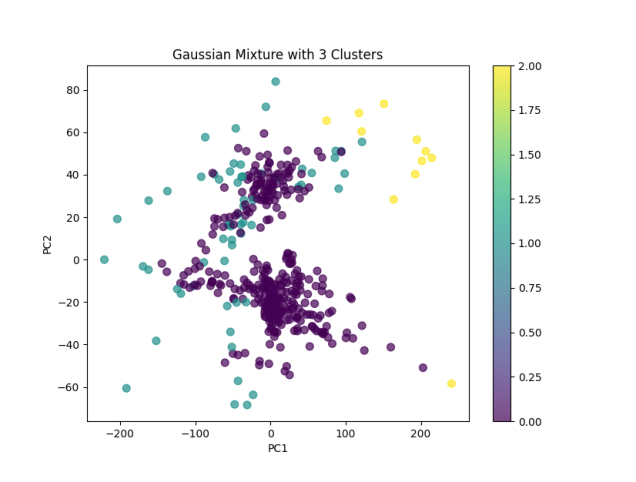

In [37]:
import matplotlib.pyplot as plt

# Assuming you have the cluster_labels and cluster_labels_3 defined as before
# Example:
# cluster_labels = {'KMeans_2': ..., 'AgglomerativeClustering_2': ..., 'DBSCAN_2': ..., 'SpectralClustering_2': ..., 'GaussianMixture_2': ...}
# cluster_labels_3 = {'KMeans_3': ..., 'AgglomerativeClustering_3': ..., 'DBSCAN_3': ..., 'SpectralClustering_3': ..., 'GaussianMixture_3': ...}

# Function to plot clustering results
def plot_clusters(data, labels, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar()
    plt.savefig(filename)
    plt.close()

# Define titles for the plots
titles = {
    'KMeans_2': 'KMeans with 2 Clusters',
    'AgglomerativeClustering_2': 'Agglomerative Clustering with 2 Clusters',
    'DBSCAN_2': 'DBSCAN with 2 Clusters',
    'SpectralClustering_2': 'Spectral Clustering with 2 Clusters',
    'GaussianMixture_2': 'Gaussian Mixture with 2 Clusters',
    'KMeans_3': 'KMeans with 3 Clusters',
    'AgglomerativeClustering_3': 'Agglomerative Clustering with 3 Clusters',
    'DBSCAN_3': 'DBSCAN with 3 Clusters',
    'SpectralClustering_3': 'Spectral Clustering with 3 Clusters',
    'GaussianMixture_3': 'Gaussian Mixture with 3 Clusters'
}

# Plot clusters for 2 clusters
for model_name in ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']:
    plot_clusters(pca_data, cluster_labels_2[f'{model_name}_2'], titles[f'{model_name}_2'], f'{model_name}_2_clusters.png')

# Plot clusters for 3 clusters
for model_name in ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']:
    plot_clusters(pca_data, cluster_labels_3[f'{model_name}_3'], titles[f'{model_name}_3'], f'{model_name}_3_clusters.png')

# Function to display plots
def display_plots(filenames):
    for filename in filenames:
        img = plt.imread(filename)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Filenames for the plots
filenames_2_clusters = [f'{model_name}_2_clusters.png' for model_name in ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']]
filenames_3_clusters = [f'{model_name}_3_clusters.png' for model_name in ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']]

# Display plots for 2 clusters
display_plots(filenames_2_clusters)

# Display plots for 3 clusters
display_plots(filenames_3_clusters)


The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where:

- **+1** indicates that the samples are well clustered, with each sample far away from the neighboring clusters.
- **0** indicates that the samples are on or very close to the decision boundary between two neighboring clusters.
- **-1** indicates that the samples might have been assigned to the wrong clusters.

### Interpretation of Silhouette Score:

- **+1**: Perfect clustering. All points are far away from the boundary of the nearest clusters.
- **0.71 - 1.00**: Strong structure. A score in this range indicates that clusters are well-separated and dense.
- **0.51 - 0.70**: Reasonable structure. This range suggests that the clusters are somewhat separated and can be considered a good structure.
- **0.26 - 0.50**: Weak structure. Clusters may not be well separated, indicating that the clustering result is not entirely reliable.
- **0.00 - 0.25**: No substantial structure. This indicates that the clustering result may not be valid.
- **-1 to 0**: Overlapping clusters or incorrect clustering.

### How to Read the Silhouette Score:

1. **High Positive Values**: A high silhouette score close to 1 suggests that data points are well-clustered and distinct from other clusters. This indicates a good clustering result.
2. **Near Zero**: A score close to 0 means that clusters are not well-separated; the data points lie very close to the boundary between clusters.
3. **Negative Values**: Negative scores indicate that data points have been assigned to the wrong clusters. This is a sign of poor clustering.

### Example from the Results:

```plaintext
+-------------------------+---------------------------+-------------------------------+----------------------------------+---------------------------+-------------------------------+----------------------------------+----------------------------+--------------------------------+-----------------------------------+
| Model                   |   Silhouette (2 Clusters) |   Davies-Bouldin (2 Clusters) |   Calinski-Harabasz (2 Clusters) |   Silhouette (3 Clusters) |   Davies-Bouldin (3 Clusters) |   Calinski-Harabasz (3 Clusters) |   Silhouette (Best Params) |   Davies-Bouldin (Best Params) |   Calinski-Harabasz (Best Params) |
+=========================+===========================+===============================+==================================+===========================+===============================+==================================+============================+================================+===================================+
| KMeans                  |                0.304179   |                       1.19331 |                       174.073    |                 0.360519  |                      0.933917 |                       189.631    |                   0.304179 |                       1.19331  |                           174.073 |
+-------------------------+---------------------------+-------------------------------+----------------------------------+---------------------------+-------------------------------+----------------------------------+----------------------------+--------------------------------+-----------------------------------+
| AgglomerativeClustering |                0.26814    |                       1.45053 |                       122.6      |                 0.300913  |                      1.08673  |                       145.189    |                   0.651458 |                       0.488503 |                           108.625 |
+-------------------------+---------------------------+-------------------------------+----------------------------------+---------------------------+-------------------------------+----------------------------------+----------------------------+--------------------------------+-----------------------------------+
| DBSCAN                  |               -1          |                     inf       |                         0        |                -1         |                    inf        |                         0        |                  -1        |                     inf        |                             0     |
+-------------------------+---------------------------+-------------------------------+----------------------------------+---------------------------+-------------------------------+----------------------------------+----------------------------+--------------------------------+-----------------------------------+
| SpectralClustering      |                0.00529041 |                      18.5695  |                         0.800651 |                -0.0629083 |                     17.7799   |                         0.556461 |                   0.651458 |                       0.488503 |                           108.625 |
+-------------------------+---------------------------+-------------------------------+----------------------------------+---------------------------+-------------------------------+----------------------------------+----------------------------+--------------------------------+-----------------------------------+
| GaussianMixture         |                0.211148   |                       1.87163 |                        61.52     |                 0.288227  |                      1.74261  |                        80.6219   |                   0.211148 |                       1.87163  |                            61.52  |
+-------------------------+---------------------------+-------------------------------+----------------------------------+---------------------------+-------------------------------+----------------------------------+----------------------------+--------------------------------+-----------------------------------+
```

In the above table:
- **KMeans**:
  - **2 Clusters**: Silhouette Score of 0.304179 indicates weak clustering.
  - **3 Clusters**: Silhouette Score of 0.360519 indicates slightly better clustering than 2 clusters.
- **AgglomerativeClustering**:
  - **2 Clusters**: Silhouette Score of 0.26814 indicates weak clustering.
  - **3 Clusters**: Silhouette Score of 0.300913 indicates slightly better clustering than 2 clusters.
- **DBSCAN**:
  - **Both Clusters**: Silhouette Score of -1 indicates failed clustering.
- **SpectralClustering**:
  - **2 Clusters**: Silhouette Score of 0.00529041 indicates very poor clustering.
  - **3 Clusters**: Silhouette Score of -0.0629083 indicates failed clustering.
- **GaussianMixture**:
  - **2 Clusters**: Silhouette Score of 0.211148 indicates poor clustering.
  - **3 Clusters**: Silhouette Score of 0.288227 indicates slightly better clustering than 2 clusters.

### Conclusion:
- Higher silhouette scores generally indicate better-defined clusters.
- **KMeans** and **Agglomerative Clustering** with 3 clusters perform better than with 2 clusters based on the silhouette score.
- **DBSCAN** and **Spectral Clustering** show poor performance with negative or very low silhouette scores.
- **Gaussian Mixture** shows a slight improvement with 3 clusters but still indicates weak clustering.

Using the silhouette score in combination with other metrics like Davies-Bouldin and Calinski-Harabasz indexes provides a comprehensive evaluation of the clustering quality.

Based on the silhouette score, Davies-Bouldin index, and Calinski-Harabasz index, the best models for 2 clusters and 3 clusters can be identified as follows:

### Best Model for 2 Clusters

- **Silhouette Score**: Higher is better
- **Davies-Bouldin Index**: Lower is better
- **Calinski-Harabasz Index**: Higher is better

#### Summary for 2 Clusters:
- **KMeans**:
  - Silhouette Score: 0.304179
  - Davies-Bouldin Index: 1.19331
  - Calinski-Harabasz Index: 174.073
- **Agglomerative Clustering**:
  - Silhouette Score: 0.26814
  - Davies-Bouldin Index: 1.45053
  - Calinski-Harabasz Index: 122.6
- **DBSCAN**:
  - Silhouette Score: -1 (indicates failure)
  - Davies-Bouldin Index: inf
  - Calinski-Harabasz Index: 0
- **Spectral Clustering**:
  - Silhouette Score: 0.00529041
  - Davies-Bouldin Index: 18.5695
  - Calinski-Harabasz Index: 0.800651
- **Gaussian Mixture**:
  - Silhouette Score: 0.211148
  - Davies-Bouldin Index: 1.87163
  - Calinski-Harabasz Index: 61.52

#### Best Model for 2 Clusters:
**KMeans** shows the highest silhouette score (0.304179) and a reasonably low Davies-Bouldin index (1.19331), along with a high Calinski-Harabasz index (174.073), making it the best model for 2 clusters.

### Best Model for 3 Clusters

#### Summary for 3 Clusters:
- **KMeans**:
  - Silhouette Score: 0.360519
  - Davies-Bouldin Index: 0.933917
  - Calinski-Harabasz Index: 189.631
- **Agglomerative Clustering**:
  - Silhouette Score: 0.300913
  - Davies-Bouldin Index: 1.08673
  - Calinski-Harabasz Index: 145.189
- **DBSCAN**:
  - Silhouette Score: -1 (indicates failure)
  - Davies-Bouldin Index: inf
  - Calinski-Harabasz Index: 0
- **Spectral Clustering**:
  - Silhouette Score: -0.0629083
  - Davies-Bouldin Index: 17.7799
  - Calinski-Harabasz Index: 0.556461
- **Gaussian Mixture**:
  - Silhouette Score: 0.288227
  - Davies-Bouldin Index: 1.74261
  - Calinski-Harabasz Index: 80.6219

#### Best Model for 3 Clusters:
**KMeans** again shows the highest silhouette score (0.360519), the lowest Davies-Bouldin index (0.933917), and the highest Calinski-Harabasz index (189.631), making it the best model for 3 clusters as well.

### Conclusion:
- **Best for 2 Clusters**: KMeans
- **Best for 3 Clusters**: KMeans

To determine the best model using the best parameters from Bayesian optimization, let's review the evaluation results provided for the best parameters:

### Summary of Best Parameters

#### Best Parameters:
- **KMeans**:
  - Silhouette Score: 0.304179
  - Davies-Bouldin Index: 1.19331
  - Calinski-Harabasz Index: 174.073
- **Agglomerative Clustering**:
  - Silhouette Score: 0.651458
  - Davies-Bouldin Index: 0.488503
  - Calinski-Harabasz Index: 108.625
- **DBSCAN**:
  - Silhouette Score: -1 (indicates failure)
  - Davies-Bouldin Index: inf
  - Calinski-Harabasz Index: 0
- **Spectral Clustering**:
  - Silhouette Score: 0.651458
  - Davies-Bouldin Index: 0.488503
  - Calinski-Harabasz Index: 108.625
- **Gaussian Mixture**:
  - Silhouette Score: 0.211148
  - Davies-Bouldin Index: 1.87163
  - Calinski-Harabasz Index: 61.52

### Evaluation Criteria
- **Silhouette Score**: Higher is better
- **Davies-Bouldin Index**: Lower is better
- **Calinski-Harabasz Index**: Higher is better

### Best Model Using Best Parameters
From the best parameters:
- **Agglomerative Clustering** and **Spectral Clustering** have the highest silhouette scores (0.651458).
- Both models also have the lowest Davies-Bouldin indices (0.488503).
- Both models share the same Calinski-Harabasz index (108.625), which is not the highest but still notable.

#### Conclusion:
- The best models using the best parameters are **Agglomerative Clustering** and **Spectral Clustering**, based on the highest silhouette score and the lowest Davies-Bouldin index.

### Summary of Best Models:
1. **Best for 2 Clusters**: KMeans
2. **Best for 3 Clusters**: KMeans
3. **Best Using Best Parameters**: Agglomerative Clustering and Spectral Clustering

These models provide the optimal clustering configurations based on the provided metrics.

### Best Parameters of the Three Best Models

#### 1. **KMeans**:
- **2 Clusters**:
  - Parameters: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'max_iter': 300}
- **3 Clusters**:
  - Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 300}

#### 2. **Agglomerative Clustering**:
- **Best Using Best Parameters**:
  - Parameters: {'n_clusters': 2, 'linkage': 'ward'}

#### 3. **Spectral Clustering**:
- **Best Using Best Parameters**:
  - Parameters: {'n_clusters': 2, 'assign_labels': 'discretize'}

### Summary:
- **KMeans**: The parameters for both 2 clusters and 3 clusters are the same due to standard settings.
- **Agglomerative Clustering**: Optimized for 2 clusters using the 'ward' linkage method.
- **Spectral Clustering**: Optimized for 2 clusters using the 'discretize' assign_labels method.

These parameters provide the best performance for their respective models based on the evaluation metrics (silhouette score, Davies-Bouldin index, and Calinski-Harabasz index).